In [1]:
df<-read.csv('d:/data/avocado/avocado.csv')
head(df)

Total.Volume,Total.Bags,Small.Bags,Large.Bags,XLarge.Bags,conventional,organic,AveragePrice,Label
29913744,9987522,6837126.1,2911554.5,238841.36,1,0,1.41,1
28785280,8944923,6592504.0,2117565.5,234853.10,1,0,1.47,1
26808411,7926179,5851814.5,1855970.2,218394.57,1,0,1.57,1
26385081,8027435,6035666.2,1818832.5,172936.77,1,0,1.56,1
3357719,1256272,832554.7,340048.8,83668.14,1,0,1.42,1
25394903,7496232,5494163.7,1923561.4,78506.59,1,0,1.57,1


In [2]:
library(dplyr)
df <- df %>% select(-AveragePrice) #분석에 사용하지 않을 필드 제외
dim(df)
summary(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 18249     8

  Total.Volume        Total.Bags         Small.Bags         Large.Bags     
 Min.   :      85   Min.   :       0   Min.   :       0   Min.   :      0  
 1st Qu.:   10839   1st Qu.:    5089   1st Qu.:    2849   1st Qu.:    127  
 Median :  107377   Median :   39744   Median :   26363   Median :   2648  
 Mean   :  850644   Mean   :  239639   Mean   :  182195   Mean   :  54338  
 3rd Qu.:  432962   3rd Qu.:  110783   3rd Qu.:   83338   3rd Qu.:  22029  
 Max.   :62505647   Max.   :19373134   Max.   :13384587   Max.   :5719097  
  XLarge.Bags        conventional       organic           Label       
 Min.   :     0.0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:     0.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :     0.0   Median :1.0000   Median :0.0000   Median :0.0000  
 Mean   :  3106.4   Mean   :0.5001   Mean   :0.4999   Mean   :0.4705  
 3rd Qu.:   132.5   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :551693.7   Max.   :1.0000   Max. 

In [3]:
(corrmatrix <- cor(df))

,Total.Volume,Total.Bags,Small.Bags,Large.Bags,XLarge.Bags,conventional,organic,Label
Total.Volume,1.0000000,0.9630471,0.9672382,0.8806396,0.7471574,0.2324344,-0.2324344,-0.1798904
Total.Bags,0.9630471,1.0000000,0.9943346,0.9430091,0.8042326,0.2177884,-0.2177884,-0.1676067
Small.Bags,0.9672382,0.9943346,1.0000000,0.9025889,0.8068446,0.2205353,-0.2205353,-0.1674398
Large.Bags,0.8806396,0.9430091,0.9025889,1.0000000,0.7108584,0.1931771,-0.1931771,-0.1565787
XLarge.Bags,0.7471574,0.8042326,0.8068446,0.7108584,1.0000000,0.1754831,-0.1754831,-0.1221387
conventional,0.2324344,0.2177884,0.2205353,0.1931771,0.1754831,1.0000000,-1.0000000,-0.5972794
organic,-0.2324344,-0.2177884,-0.2205353,-0.1931771,-0.1754831,-1.0000000,1.0000000,0.5972794
Label,-0.1798904,-0.1676067,-0.1674398,-0.1565787,-0.1221387,-0.5972794,0.5972794,1.0000000


Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded


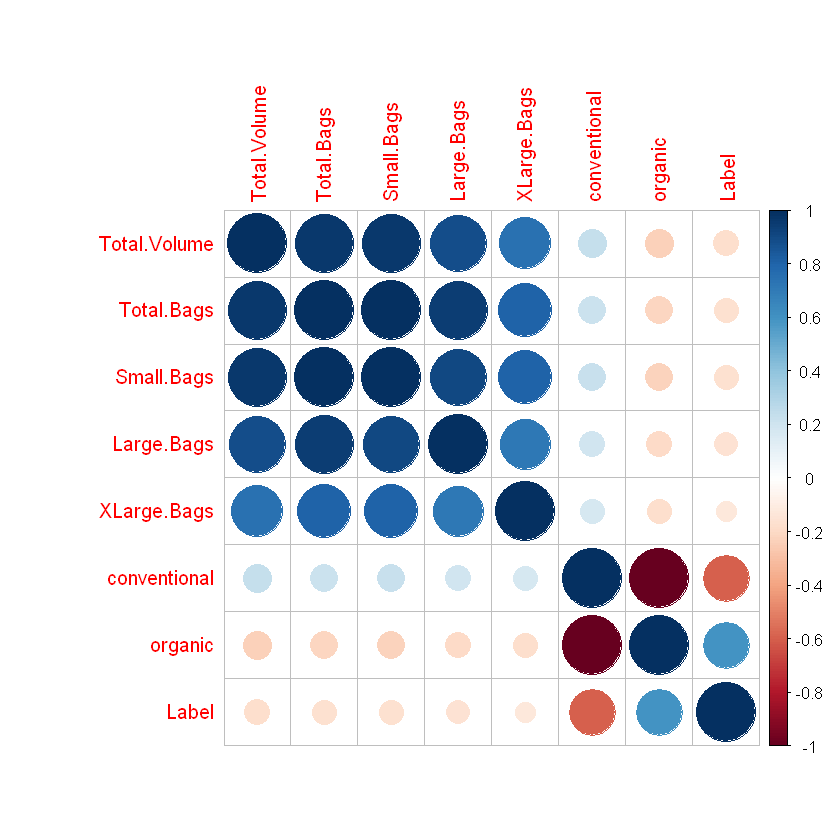

In [4]:
library(corrplot)
corrplot(cor(df),method='circle')


   0    1 
9662 8587 

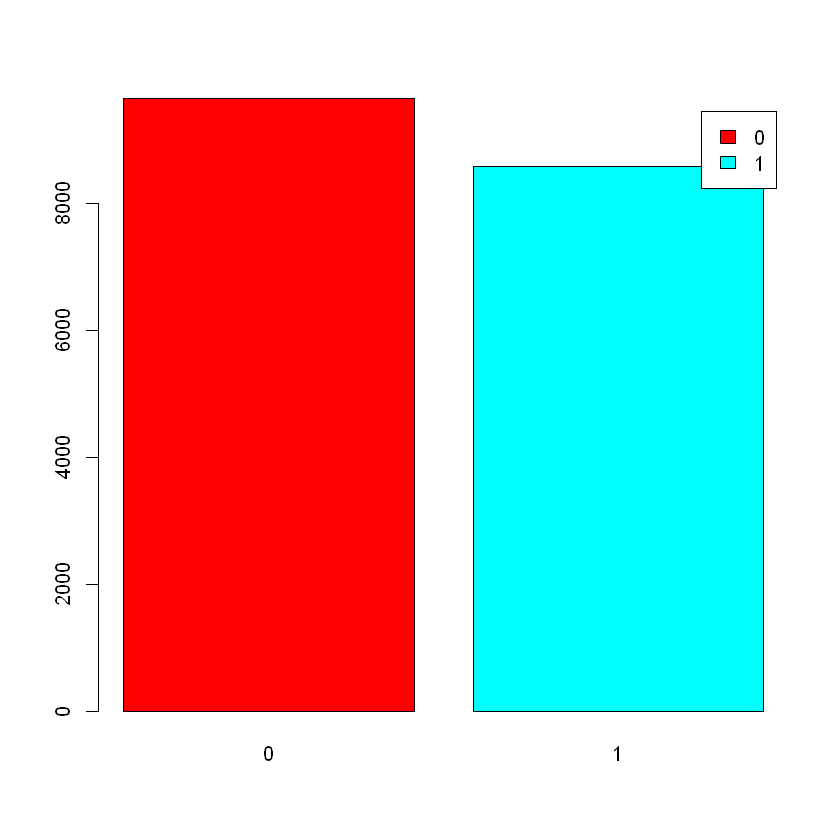

In [5]:
(tbl<-table(df$Label))
barplot(tbl,beside=T,legend=T,col=rainbow(2))

In [6]:
library(ROSE)
df_samp <- ovun.sample(Label ~ . , df, seed=1, method='under',
                      N=8587*2)$data
(tbl<-table(df_samp$Label))

Warning message:
"package 'ROSE' was built under R version 3.6.2"Loaded ROSE 0.0-3




   0    1 
8587 8587 

Warning message:
"package 'reshape' was built under R version 3.6.2"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

Using  as id variables


variable,value
Total.Volume,6118107.22
Total.Volume,218957.86
Total.Volume,117941.49
Total.Volume,4143.28
Total.Volume,112192.95
Total.Volume,133142.97
Total.Volume,160413.49
Total.Volume,86908.34
Total.Volume,330371.24
Total.Volume,49143.63


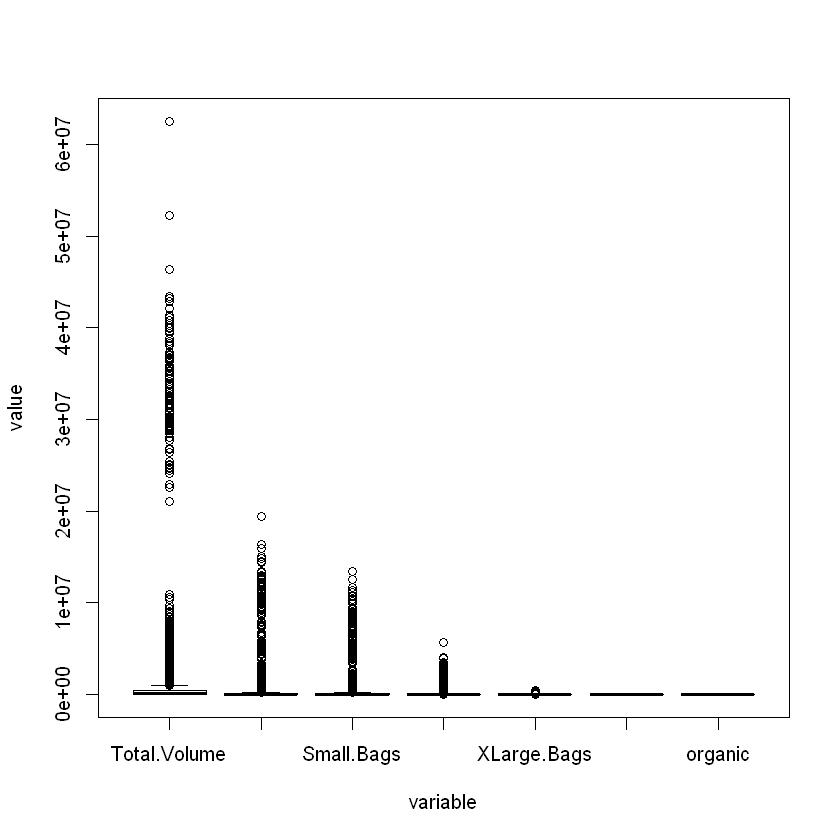

In [24]:
library(reshape)
meltData <- melt(X_train)
meltData
boxplot(data=meltData, value~variable)

In [20]:
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df_samp$Label,p=0.8,list=F)
train<-df_samp[idx_train,] #학습용
X_train<-train[,-8]
y_train<-train[,8]
test<-df_samp[-idx_train,] #검증용
X_test<-test[,-8]
y_test<-test[,8]

In [21]:
model <-glm(Label ~. , data=train, family=binomial) #로지스틱회귀모형

In [22]:
summary(model)


Call:
glm(formula = Label ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8110  -0.6869   0.3060   0.6826   3.2876  

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.339e+00  2.941e-02  45.551  < 2e-16 ***
Total.Volume -3.123e-07  6.125e-08  -5.099 3.42e-07 ***
Total.Bags    2.391e-02  3.675e-01   0.065    0.948    
Small.Bags   -2.390e-02  3.675e-01  -0.065    0.948    
Large.Bags   -2.391e-02  3.675e-01  -0.065    0.948    
XLarge.Bags  -2.389e-02  3.675e-01  -0.065    0.948    
conventional -2.637e+00  4.574e-02 -57.646  < 2e-16 ***
organic              NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 19048  on 13739  degrees of freedom
Residual deviance: 13650  on 13733  degrees of freedom
AIC: 13664

Number of Fis

In [23]:
 (coef1 <- coef(model)) #회귀계수

(Intercept)  Total.Volume    Total.Bags    Small.Bags    Large.Bags 
 1.339478e+00 -3.123112e-07  2.390537e-02 -2.390457e-02 -2.390602e-02 
  XLarge.Bags  conventional       organic 
-2.389335e-02 -2.636636e+00            NA

In [19]:
pred <- predict(model, newdata=X_test, type='response')
result<- ifelse(pred>0.5,1,0)
head(result)
head(y_test)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

12 24 29 33 37 40 
 1  0  0  0  0  0

[1] 0 0 0 0 0 0

In [15]:
mean(y_test == result) #예측정확도

[1] 0.8011066

In [16]:
table(y_test,result) #오분류표

      result
y_test    0    1
     0 1326  391
     1  292 1425